In [232]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [261]:
df = pd.read_csv("consumer_complaints.csv",index_col=0,parse_dates=True)

In [262]:
df.columns

Index(['Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [263]:
equifax = df['Company'] == 'EQUIFAX, INC.'

In [264]:
df =df[equifax]

In [265]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(', '').str.replace(')','')

In [266]:
df.head()

,product,sub-product,issue,sub-issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_id
Date received,,,,,,,,,,,,,,,,,
2019-09-12,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",PA,19141,NaN,NaN,Web,09/12/2019,Closed with explanation,Yes,NaN,3372085
2019-09-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",MO,631XX,NaN,NaN,Web,09/12/2019,Closed with explanation,Yes,NaN,3371743
2019-09-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NY,14617,NaN,NaN,Web,09/12/2019,Closed with explanation,Yes,NaN,3372051
2019-09-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",CA,90505,NaN,NaN,Web,09/12/2019,Closed with explanation,Yes,NaN,3371730
2019-09-12,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with fraud alerts or security freezes,NaN,NaN,NaN,"EQUIFAX, INC.",WY,NaN,NaN,NaN,Web,09/12/2019,Closed with explanation,Yes,NaN,3371844


In [267]:
df.dtypes

product                         object
sub-product                     object
issue                           object
sub-issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zip_code                        object
tags                            object
consumer_consent_provided?      object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response?                object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [268]:
df.consumer_complaint_narrative = df.consumer_complaint_narrative.astype(str)

In [269]:
df.dtypes

product                         object
sub-product                     object
issue                           object
sub-issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zip_code                        object
tags                            object
consumer_consent_provided?      object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response?                object
consumer_disputed?              object
complaint_id                     int64
dtype: object

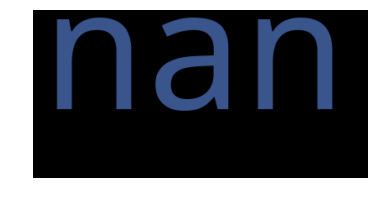

In [270]:

# Start with one review:
text = df.consumer_complaint_narrative[1]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [271]:
#Only keep bare minimum
text = df[['complaint_id','consumer_complaint_narrative']]

In [272]:
text = text.replace('nan',np.NaN)

In [273]:
text.dropna(how='any', inplace=True)

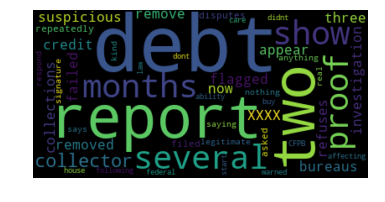

In [274]:
# Start with one review:
text1 = text.consumer_complaint_narrative[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

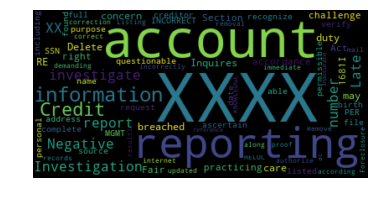

In [275]:
# Start with one review:
text2 = noX.consumer_complaint_narrative[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [282]:
text.head()

,complaint_id,consumer_complaint_narrative
Date received,,
2019-07-15,3306425,I had two suspicious collections appear on my ...
2019-07-15,3306677,I am victim of Identity Theft. \n( a ) Block. ...
2019-07-15,3306807,I AM A VICTIM OF ID THEFT. I HAVE ATTEMPTED ON...
2019-07-15,3306318,I HAD 2 COLLECTIONS ON MY CREDIT REPORTS AND T...
2019-07-15,3307425,XXXX XXXX Credit Card Services made an urgent ...


In [296]:
type(text.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [297]:
cleantext = " ".join(review for review  in text.consumer_complaint_narrative)

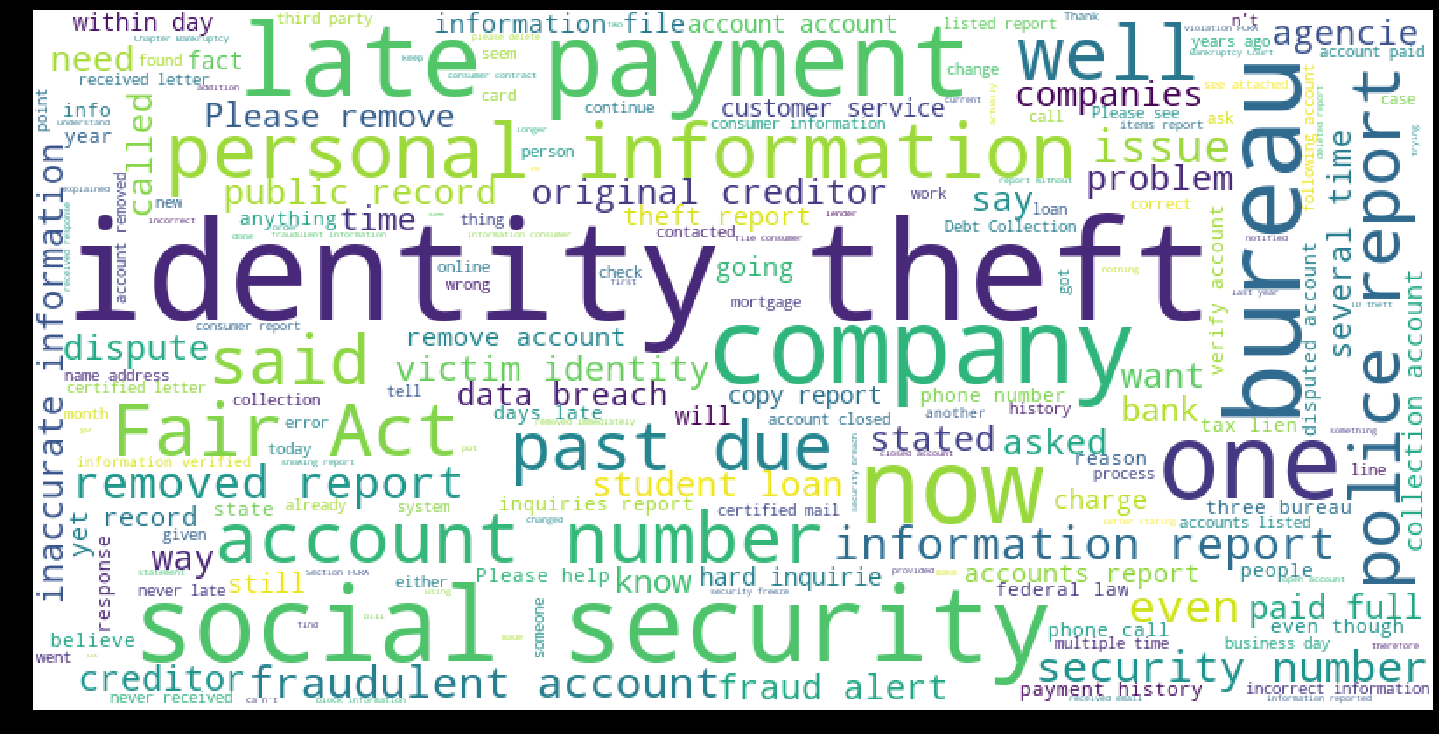

In [300]:
# Create stopword list:
stopwords = set(STOPWORDS)

#wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black").generate(cleantext)
stopwords.update(["X", "XX", "XXX", "XXXX", "credit", "Equifax", "reporting", "agency", "told","said"
                 "called", "companie","informed","show","website",
                  "three bureau certified letter name address", "inquiry", "sent"])
# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400,stopwords=stopwords, background_color="white").generate(cleantext)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [301]:
wordcloud.to_file("cloud.png")